# Exercise 1 A

## Power Reflection

In [64]:
import numpy as np
import matplotlib.pyplot as plt

N = 32
n1 = 3.5
n2 = 2.9
ld = 900         # nm

L1 = 64.3           # nm
L2 = 77.6           # nm

xlim0 = 800         # nm
xlim1 = 1000        # nm

In [65]:
# Power reflection
st = 1                                  # nm
lambdas = np.arange(xlim0, xlim1+st, st)     # nm

Rtot = []
Ttot = []
for l in lambdas:
    k0 = 2*np.pi/l
    T = lambda n1, n2 : 1/(2*n2) * np.array([[n2 + n1, n2 - n1], [n2 - n1, n2 + n1]])
    TL = lambda L, n: np.array([[np.exp(1j*n*k0*L), 0], [0, np.exp(-1j*n*k0*L)]])

    # build the unit transfer matrix
    Tunit = (np.matmul(np.matmul(np.matmul(TL(L2, n2), T(n1, n2)), TL(L1, n1)), T(n2, n1)))

    Tt = np.identity(len(Tunit))
    for i in range(N):
        Tt = np.matmul(Tt, Tunit)

    Rtot.append(np.abs(np.divide(Tt[0][1], Tt[1][1]))**2)
    Ttot.append(np.absolute(Tt[0][0] - np.divide((Tt[0][1] * Tt[1][0]), Tt[1][1]))**2)

Rtot = np.array(Rtot)
Ttot = np.array(Ttot)

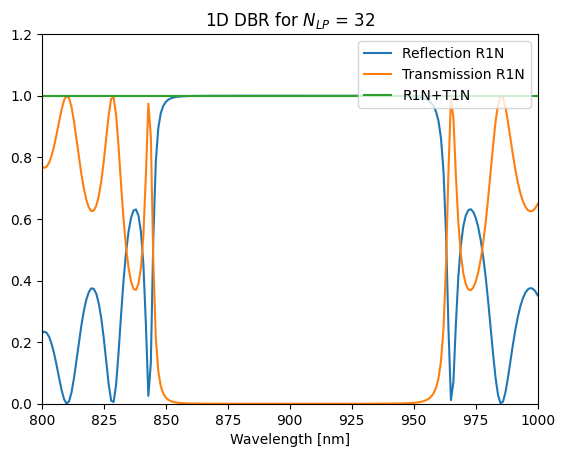

In [66]:
plt.figure()
plt.plot(lambdas, Rtot, label="Reflection R1N")
plt.plot(lambdas, Ttot, label="Transmission R1N")
plt.plot(lambdas, Rtot + Ttot, label="R1N+T1N")
plt.xlabel("Wavelength [nm]")
plt.xlim([xlim0, xlim1])
plt.ylim([0, 1.2])
plt.title("1D DBR for $N_{LP}$ = " + str(N))
plt.legend(loc='upper right')
plt.show()